# Stat Test

In [198]:
%pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [199]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [200]:
from statsmodels.stats.weightstats import ztest as ztest
import numpy as np
from scipy import stats

In [201]:
data = [88, 92, 85, 90, 95, 87, 93, 91, 89, 94, 57, 112, 94, 88, 90, 91, 92, 93, 95, 96, 97,115]
print(np.mean(data))
ztest_stats, p_value = ztest(data, value=90)

92.0


In [202]:
print(ztest_stats)
print(p_value)
alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis: The mean is significantly different from 90.")
else:
    print("accept the null hypothesis: The mean is not significantly different from 90.")

0.8871599691729198
0.37499278111596746
accept the null hypothesis: The mean is not significantly different from 90.


In [203]:
if ztest_stats > 1.96 or ztest_stats < -1.96:
    print("Reject vo")
else:
    print("accept vo")

accept vo


In [204]:
ages = [23, 25, 22, 24, 26, 27, 28, 29, 30, 31, 50, 60, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 51, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]

In [205]:
import pandas as pd
ages_mean = np.mean(ages)
ages_mean

np.float64(34.97435897435897)

In [206]:
sample_size = 15
age_sample = np.random.choice(ages, size=sample_size)

In [207]:
age_sample

array([23, 37, 31, 38, 37, 34, 36, 30, 44, 22, 60, 40, 41, 42, 39])

In [208]:
np.mean(age_sample)

np.float64(36.93333333333333)

In [209]:
from scipy.stats import ttest_1samp

In [210]:
s,p = ttest_1samp(age_sample, popmean=45)
if p <= 0.05: # type: ignore
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


In [211]:
ttest_1samp(age_sample,31)

TtestResult(statistic=np.float64(2.536652520818108), pvalue=np.float64(0.023723311203750902), df=np.int64(14))

In [212]:
ttest_1samp(age_sample,28)

TtestResult(statistic=np.float64(3.819229638085691), pvalue=np.float64(0.0018781466741796776), df=np.int64(14))

In [213]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import math
np.random.seed(15)  # For reproducibility
school_age = stats.poisson.rvs(mu=25, size=1000)  # Simulating school ages with a Poisson distribution
classA_age = stats.poisson.rvs(mu=34, size=100)  # Simulating ages for Class A

In [214]:
school_age

array([31, 14, 21, 22, 18, 33, 28, 30, 19, 12, 29, 25, 18, 19, 22, 27, 27,
       24, 23, 16, 16, 18, 27, 20, 23, 30, 21, 23, 28, 25, 24, 30, 32, 18,
       33, 20, 18, 22, 29, 27, 34, 24, 26, 20, 34, 26, 28, 18, 27, 35, 20,
       23, 28, 24, 23, 31, 28, 28, 26, 18, 29, 27, 15, 27, 29, 17, 40, 20,
       29, 24, 20, 30, 30, 29, 24, 21, 19, 25, 28, 19, 22, 29, 21, 25, 25,
       20, 27, 33, 28, 21, 24, 28, 21, 25, 21, 21, 36, 36, 22, 34, 16, 30,
       27, 30, 15, 19, 24, 34, 21, 28, 30, 23, 25, 30, 22, 16, 25, 20, 24,
       34, 16, 29, 23, 21, 24, 28, 26, 34, 28, 20, 32, 25, 23, 27, 34, 33,
       29, 21, 24, 25, 19, 32, 22, 25, 19, 22, 21, 21, 34, 27, 21, 29, 21,
       23, 23, 27, 19, 25, 27, 28, 23, 31, 25, 18, 23, 18, 20, 30, 23, 29,
       23, 35, 15, 30, 16, 25, 28, 19, 22, 34, 24, 28, 19, 26, 18, 22, 28,
       23, 23, 30, 24, 26, 26, 17, 26, 24, 23, 28, 24, 22, 30, 26, 20, 25,
       30, 19, 26, 25, 23, 32, 16, 21, 26, 26, 36, 21, 40, 16, 25, 23, 25,
       21, 27, 21, 14, 24

In [215]:
classA_age

array([40, 28, 29, 29, 28, 31, 39, 28, 43, 46, 27, 36, 35, 34, 38, 40, 33,
       33, 45, 37, 27, 35, 32, 37, 25, 38, 39, 44, 37, 34, 31, 46, 30, 28,
       32, 33, 31, 22, 36, 38, 24, 40, 43, 29, 26, 37, 36, 38, 41, 28, 34,
       30, 24, 35, 25, 41, 34, 33, 33, 31, 35, 37, 28, 30, 27, 37, 38, 28,
       42, 30, 38, 34, 39, 32, 34, 29, 26, 41, 36, 38, 38, 32, 32, 36, 30,
       34, 33, 33, 36, 35, 38, 29, 35, 30, 33, 36, 36, 32, 35, 36])

In [216]:
classA_age.mean() # type: ignore

np.float64(33.94)

In [217]:
tstatistics, p_value = ttest_1samp(classA_age, popmean=school_age.mean()) #type: ignore

In [218]:
if p_value <= 0.05:  # type: ignore
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


In [219]:
np.random.seed(10)  # For reproducibility
classB_age = stats.poisson.rvs(mu=36, size=100)  # Simulating ages for Class B
classB_age.mean()  # type: ignore

np.float64(35.46)

In [220]:
_, p_value = stats.ttest_ind(a=classA_age, b=classB_age, equal_var=False)  # Independent t-test

In [221]:
if p_value <= 0.05:  # type: ignore
    print("reject null hypothesis : classes are dependent")
else:
    print("accept null hypothesis : classes are independent")

reject null hypothesis : classes are dependent


# Correlation

In [222]:
import seaborn as sns
df = sns.load_dataset("iris")

In [223]:
df.shape

(150, 5)

In [224]:
df.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


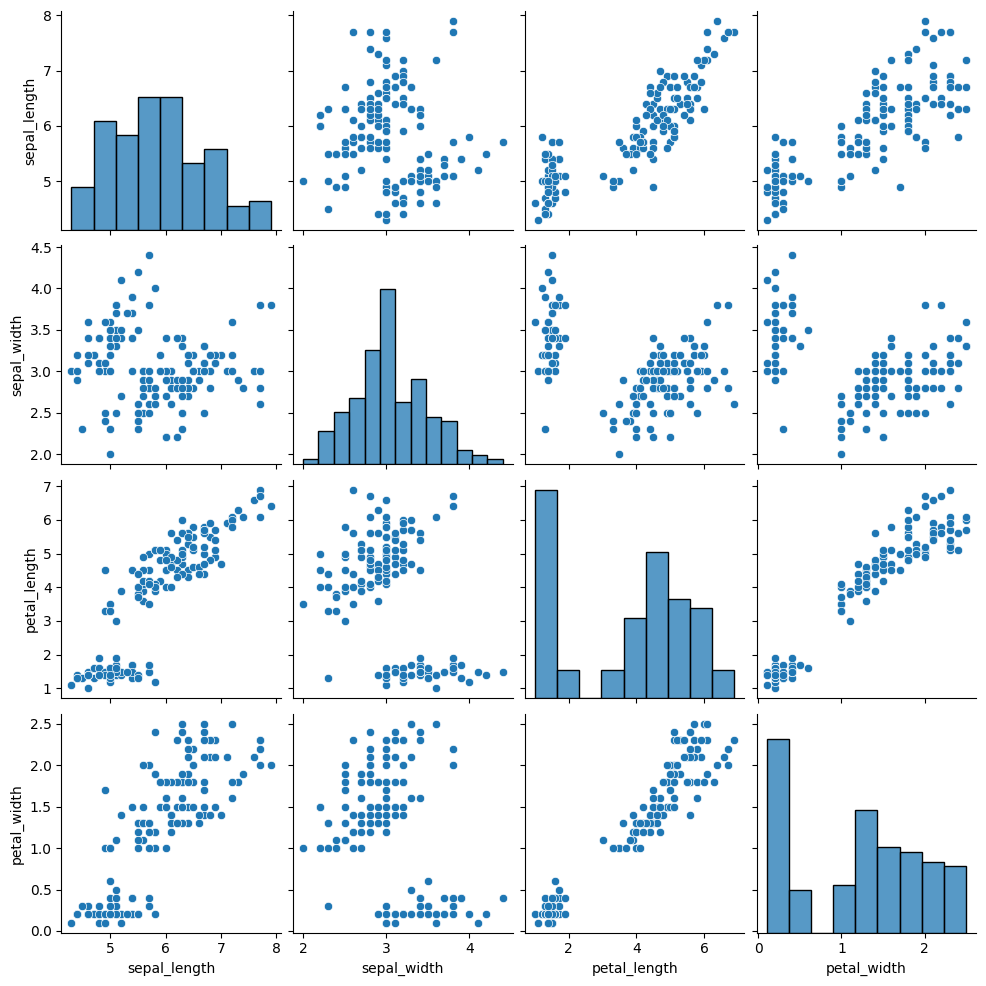

In [225]:
sns.pairplot(df)

# chi- square test

In [226]:
import scipy.stats as stats

In [227]:
import seaborn as sns
import pandas as pd
import numpy as np
dataset = sns.load_dataset('tips')

In [228]:
df = pd.read_csv("tips.csv")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [229]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [230]:
dataset_table = pd.crosstab(dataset['sex'], dataset['smoker'])
print(dataset_table)

smoker  Yes  No
sex            
Male     60  97
Female   33  54


In [231]:
dataset_table.values 

array([[60, 97],
       [33, 54]])

In [232]:
observed_values = dataset_table.values
print("observed_values: \n", observed_values)

observed_values: 
 [[60 97]
 [33 54]]


In [233]:
chi2, p_value, dof, expected_values = stats.chi2_contingency(dataset_table)

In [234]:
alpha = 0.05
critical_value = stats.chi2.ppf(q=1-alpha, df=dof)
print("Critical Value:", critical_value)

Critical Value: 3.841458820694124


In [235]:
p_value

np.float64(1.0)

# Census Income Data Set

In [236]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

In [237]:
data = pd.read_csv("adult.csv")
data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [238]:
data['workclass'].unique()

array(['Private', 'Local-gov', '?', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [239]:
data_num = data.copy()

In [240]:
data.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,1079.067626,87.502314,40.422382
std,13.710510,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [241]:
data.describe(include='O') # type: ignore

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [242]:
data.isnull().sum()

age                0
workclass          0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Data Cleaning


In [243]:
attrib, counts = np.unique(data['workclass'], return_counts=True)
most_freq_atttrib = attrib[np.argmax(counts, axis = 0)]
data['workclass'] [data['workclass'] == '?'] = most_freq_atttrib

attrib, counts = np.unique(data['occupation'], return_counts=True)
most_freq_atttrib = attrib[np.argmax(counts, axis = 0)]
data['occupation'] [data['occupation'] == '?'] = most_freq_atttrib

attrib, counts = np.unique(data['native-country'], return_counts=True)
most_freq_atttrib = attrib[np.argmax(counts, axis = 0)]
data['native-country'] [data['native-country'] == '?'] = most_freq_atttrib

In [244]:
data['workclass'] [data['workclass'] == '?']

Series([], Name: workclass, dtype: object)

In [245]:
data.head(10)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,Private,HS-grad,9,Never-married,Prof-specialty,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [246]:
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
data.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,Private,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,30,United-States,0


In [247]:
data_num = data.drop(['educational-num', 'income'], axis = 1)
data_num.describe()

,age,capital-gain,capital-loss,hours-per-week
count,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1079.067626,87.502314,40.422382
std,13.710510,7452.019058,403.004552,12.391444
min,17.000000,0.000000,0.000000,1.000000
25%,28.000000,0.000000,0.000000,40.000000
50%,37.000000,0.000000,0.000000,40.000000
75%,48.000000,0.000000,0.000000,45.000000
max,90.000000,99999.000000,4356.000000,99.000000


In [248]:
data.describe(include='O')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
count,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
freq,36705,15784,22379,8981,19716,41762,32650,44689


# EDA

Text(0, 0.5, 'No of people')

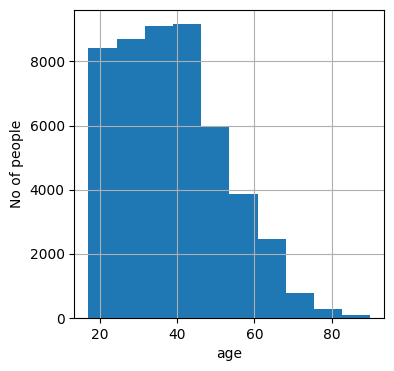

In [249]:
data['age'].hist(figsize=(4,4))
plt.xlabel('age')
plt.ylabel('No of people')

In [250]:
data[data['age']>70].shape

(868, 14)

<Axes: ylabel='age'>

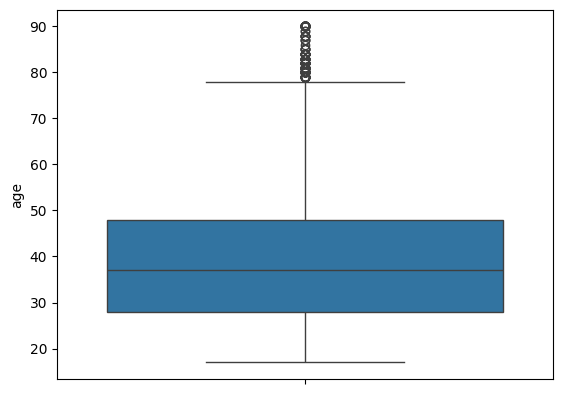

In [251]:
sns.boxplot(data['age']) # type: ignore

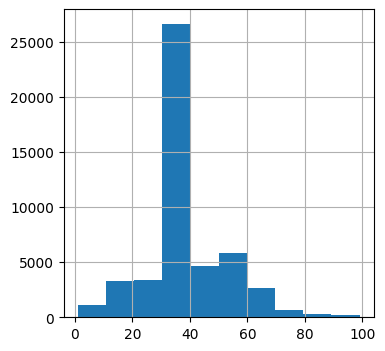

In [252]:
data['hours-per-week'].hist(figsize=(4,4))
plt.show()
# plt.xlabel('Hours per week')
# plt.ylabel('No of people')

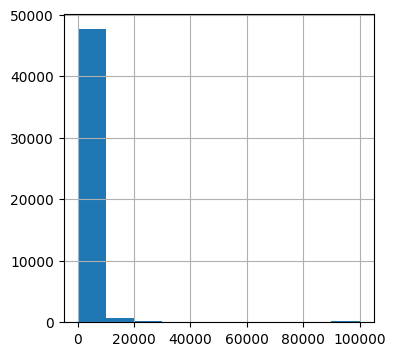

Text(0, 0.5, 'No of people')

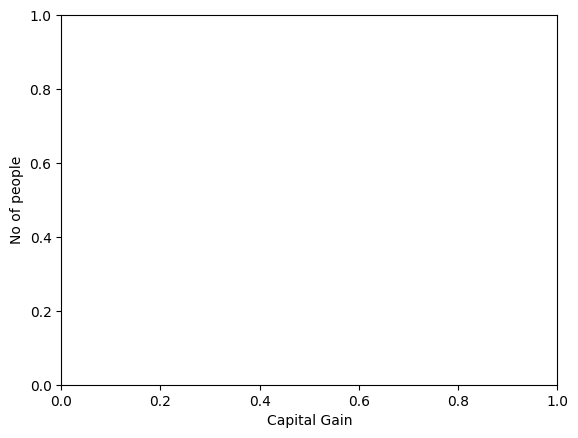

In [253]:
data['capital-gain'].hist(figsize=(4,4))
plt.show()
plt.xlabel('Capital Gain')
plt.ylabel('No of people')

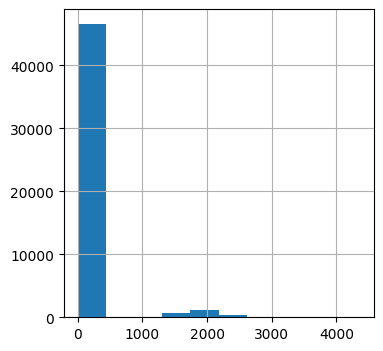

Text(0, 0.5, 'No of people')

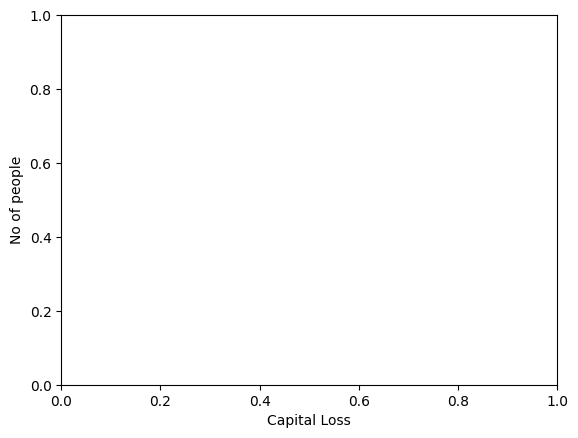

In [254]:
data['capital-loss'].hist(figsize=(4,4))
plt.show() 
plt.xlabel('Capital Loss')
plt.ylabel('No of people')

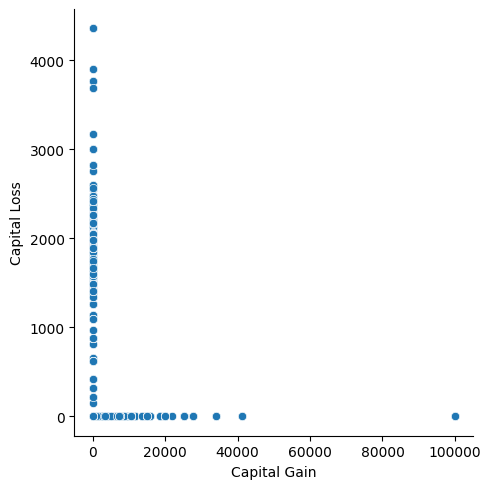

In [255]:
sns.relplot(x='capital-gain', y='capital-loss', data=data)
plt.xlabel('Capital Gain')
plt.ylabel('Capital Loss')
plt.show()

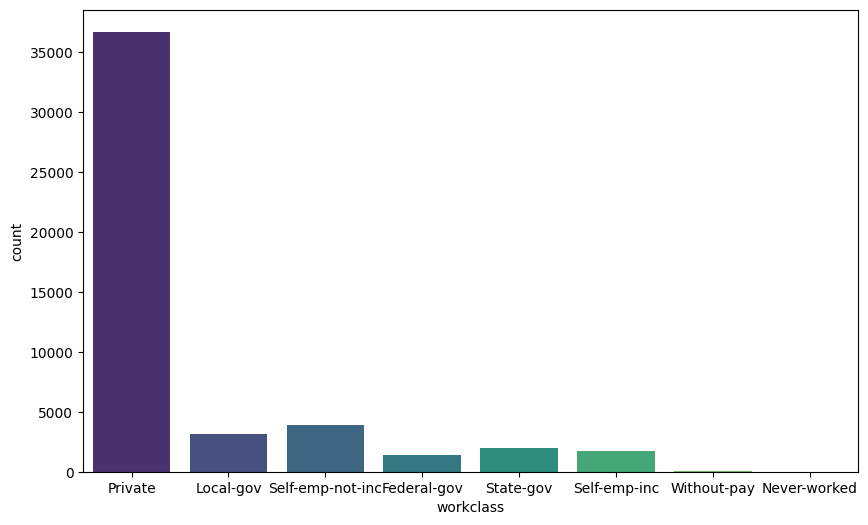

In [256]:
plt.figure(figsize=(10, 6))

# total = float(len(data['income']))

ax = sns.countplot(x='workclass', data=data, palette='viridis')

# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width() / 2.,
#              height + 3,
#              '{:.1f}'.format((height/total) * 100),
#              ha="center")

plt.show()  

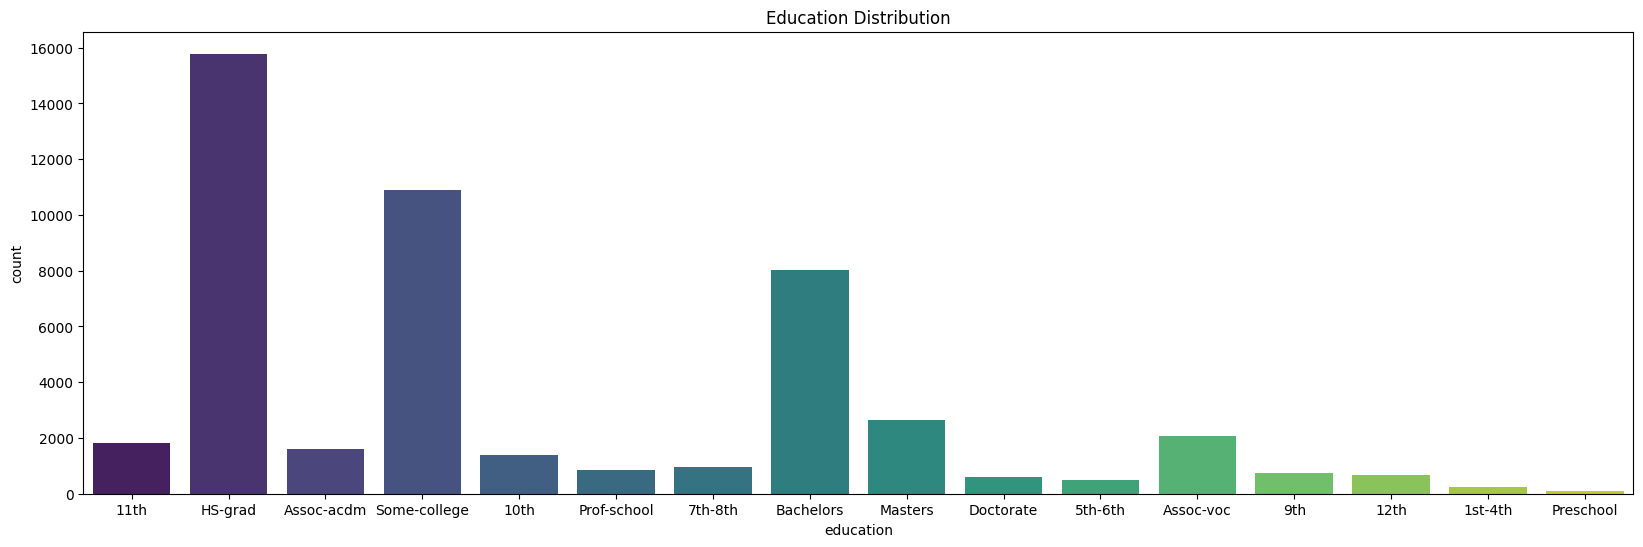

In [257]:
plt.figure(figsize=(20, 6))

# total = float(len(data['income']))

ax = sns.countplot(x='education', data=data, palette='viridis')

# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width() / 2.,
#              height + 3,
#              '{:.1f}'.format((height/total) * 100),
#              ha="center")
plt.title('Education Distribution')
plt.show() 

In [258]:
data[data['education'] == 'Bachelors'].shape 

(8025, 14)

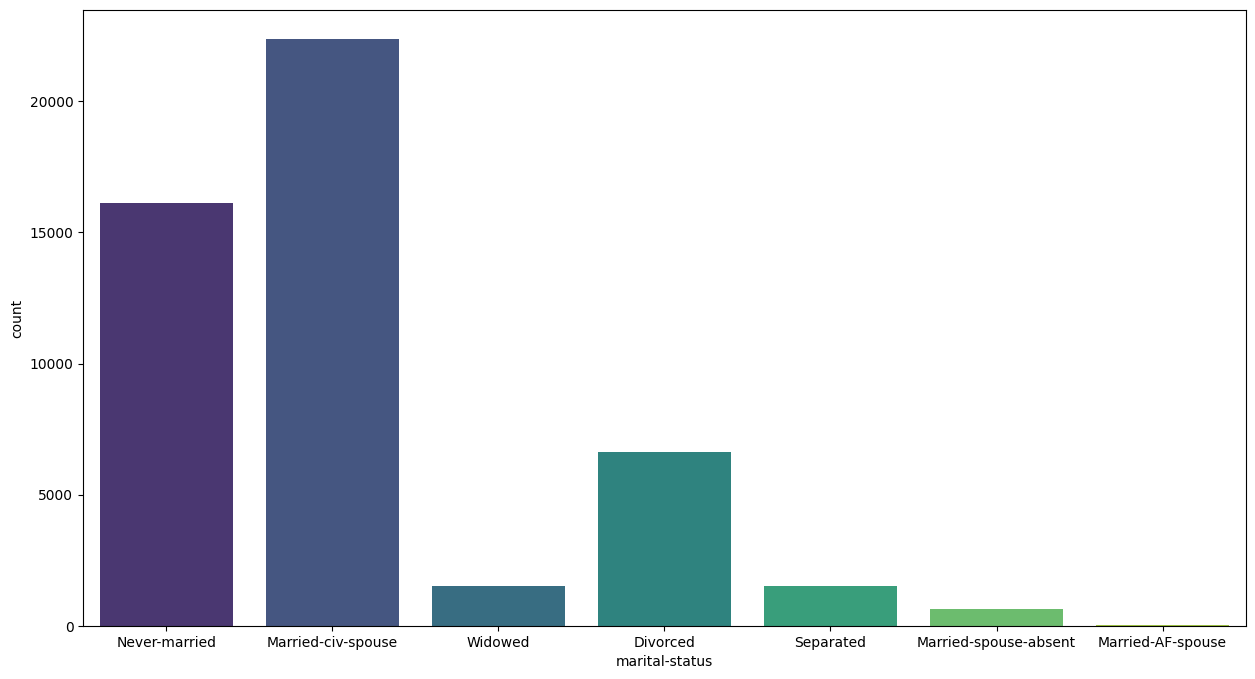

In [259]:
plt.figure(figsize=(15, 8))

# total = float(len(data))

ax = sns.countplot(x="marital-status", data=data, palette='viridis')

# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width() / 2.,
#              height + 3,
#              '{:.1f}'.format((height/total) * 100),
#              ha="center")
plt.show() 

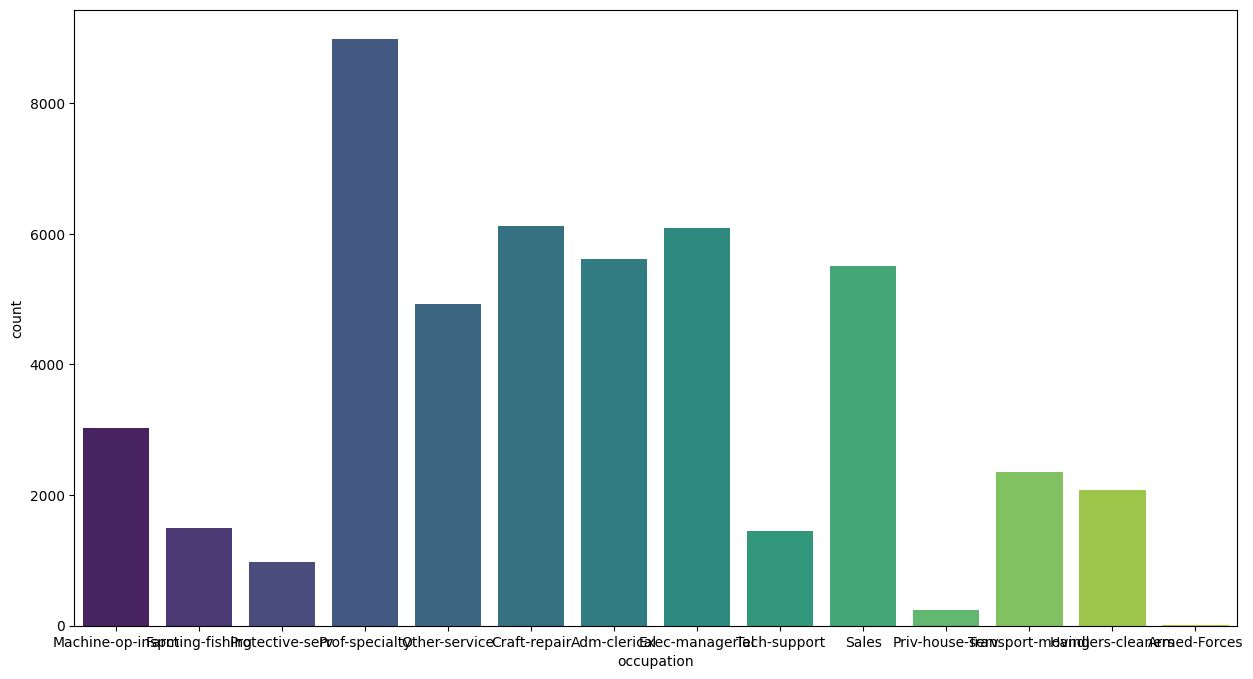

In [260]:
plt.figure(figsize=(15, 8))

# total = float(len(data))

ax = sns.countplot(x='occupation', data=data, palette='viridis')

# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width() / 2.,
#              height + 3,
#              '{:.1f}'.format((height/total) * 100),
#              ha="center")
plt.show() 

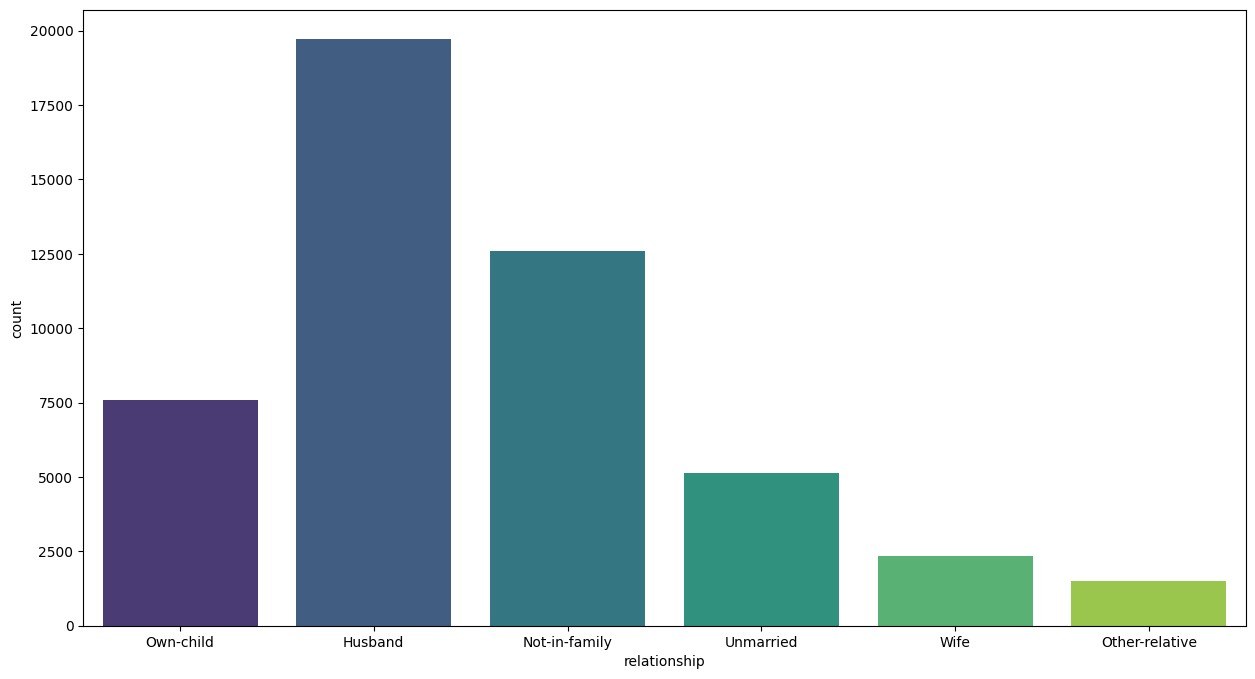

In [261]:
plt.figure(figsize=(15, 8))

# total = float(len(data))

ax = sns.countplot(x='relationship', data=data, palette='viridis')

# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width() / 2.,
#              height + 3,
#              '{:.1f}'.format((height/total) * 100),
#              ha="center")
plt.show() 

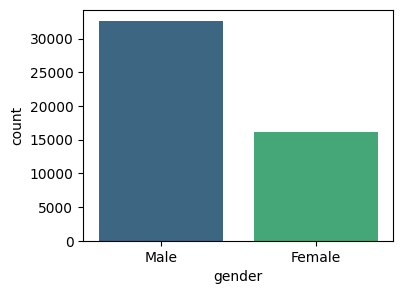

In [262]:
plt.figure(figsize=(4, 3))

# total = float(len(data))

ax = sns.countplot(x='gender', data=data, palette='viridis')

# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width() / 2.,
#              height + 3,
#              '{:.1f}'.format((height/total) * 100),
#              ha="center")
plt.show() 

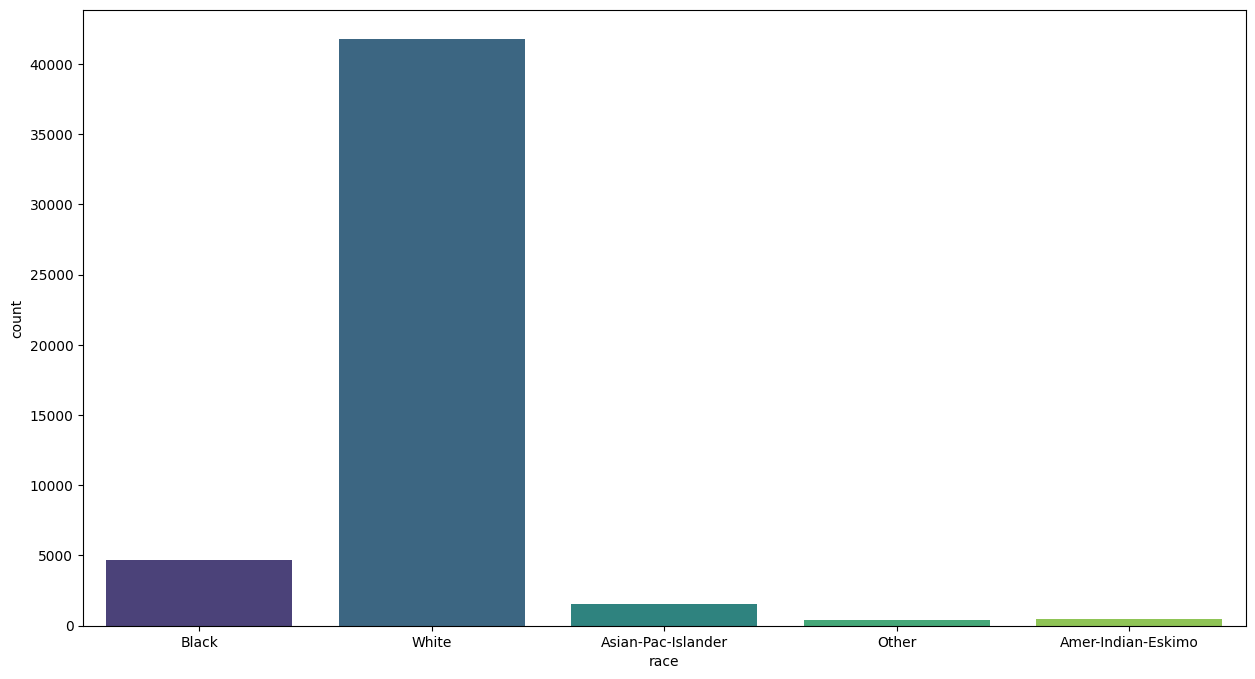

In [263]:
plt.figure(figsize=(15, 8))

# total = float(len(data))

ax = sns.countplot(x='race', data=data, palette='viridis')

# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width() / 2.,
#              height + 3,
#              '{:.1f}'.format((height/total) * 100),
#              ha="center")
plt.show() 

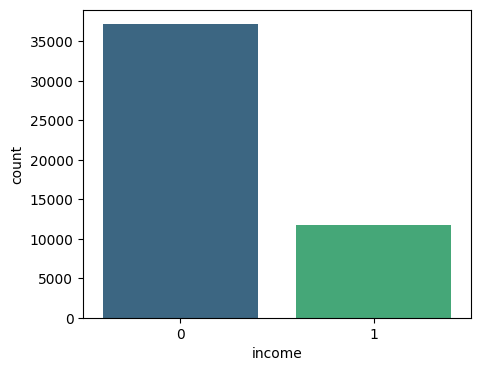

In [264]:
plt.figure(figsize=(5, 4))

# total = float(len(data))

ax = sns.countplot(x='income', data=data, palette='viridis')

# for p in ax.patches:
#     height = p.get_height()
#     ax.text(p.get_x() + p.get_width() / 2.,
#              height + 3,
#              '{:.1f}'.format((height/total) * 100),
#              ha="center")
plt.show() 